The decay photon emergu density is given by Eqn. 4 in https://arxiv.org/pdf/2508.09139

$$
\rho_\gamma=\Gamma \mathcal{T} n_2 \frac{\Delta m^2}{2 m_2}
$$

- $\mathcal{T}$ is the exposure time.
- $\Gamma$ denotes the decay rate of $X_2$.
- $n_2$ is the number density of CvB.
- $\Delta m^2\equiv m_2^2 - m_1^2$ is the squared-mass difference.

The photon emission rate in an integral sphere with volume $V$ will be:
$$
R_\gamma = \frac{\rho_\gamma V}{E_\gamma \mathcal{T}} = \Gamma n_2 V
$$

It is worth noting that the photon energy given by $X_2 \rightarrow X_1+\gamma$ process:
$$
E_\gamma  = \frac{\Delta m^2}{2m_2}
$$

Intuitively, as long as $R_\gamma > \mathrm{DCR}$, one can make a discovery.

# Lossless Sphere

In this case, all photons will be reflected in a diffusive way, and they will eventually arrive on the sensors (no matter where they are). Assuming the sensor has zero volume (so it doesn't absorb photons without giving signals), then all you need is a big enough volume.

Current experimental values for squared mass differences of three neutrinos are

$$
\begin{aligned}
& \Delta m_{21}^2=7.59 \times 10^{-5} \mathrm{eV}^2 \\
& \Delta m_{32}^2=2.32 \times 10^{-3} \mathrm{eV}^2
\end{aligned}
$$

For Normal Hierachical (NH) spectrum $m_1 \ll m_2 < m_3$:
$$
\begin{aligned}
& m_2 \simeq \sqrt{\Delta m_{21}^2} \sim 8.6 \times 10^{-3} \mathrm{eV} \\
& m_3 \simeq \sqrt{\Delta m_{32}^2+\Delta m_{21}^2} \sim 0.05 \mathrm{eV}
\end{aligned}
$$

For Inverted Hierachical (IH) specrtrum $m_3 \ll m_1 < m_2$:
$$
\begin{aligned}
& m_1 \simeq \sqrt{\left|\Delta m_{32}^2+\Delta m_{21}^2\right|} \sim 0.0492 \mathrm{eV} \\
& m_2 \simeq \sqrt{\left|\Delta m_{32}^2\right|} \sim 0.05 \mathrm{eV}
\end{aligned}
$$


The number density of cosmic neutrinos is given by 
$$
n_\nu=\frac{3}{4} \frac{\zeta(3)}{\pi^2} T_\nu^3 N_{\mathrm{eff}} \approx 112 \mathrm{~cm}^{-3}
$$

for each flavor with $T_\nu=1.95 K$ and $N_\mathrm{eff}=3.046$.

The decay rate is not explicitly derived anywhere in literature. We will reverse engineer it from Eqn. (46) and (45).

$$
\bar{E}_{(\mathrm{eff})}=\sqrt{\frac{\Gamma_{i j} \mathcal{T} V_{\mathrm{eff}} n_\nu \Delta m_{i j}^2}{2 m_i \varepsilon_0}}
$$

$$
\eta \equiv \frac{1}{2 \sqrt{2}} d \sqrt{C \omega} \cos \Theta \bar{E}_{(\mathrm{eff})}
$$

$$
p_* \equiv p_{g \rightarrow e}(\tau) \simeq(\eta \tau)^2
$$

$$
p_* \simeq 2.1 \times 10^{-27} \times\left(\frac{d}{100 \mu \mathrm{~m}}\right)^2\left(\frac{C}{0.1 \mathrm{pF}}\right)\left(\frac{f}{1 \mathrm{GHz}}\right)\left(\frac{\tau}{100 \mu \mathrm{~s}}\right)^3\left(\frac{\mu}{10^{-11} \mu_B}\right)^2\left(\frac{\Delta m_{i j}^2}{10^{-5} \mathrm{eV}^2}\right)^4\left(\frac{V_{\mathrm{eff}} n_\nu}{112 \mathrm{~cm}^{-3}}\right)\left(\frac{0.05 \mathrm{eV}}{m_i}\right)^4
$$

ChatGPT gives:
$$
\Gamma_{ij} = \frac{|\mu_{ij}|^2}{8\pi} \cdot \frac{(m_j^2 - m_i^2)^3}{m_j^3}
$$

which is 
$$
\Gamma_{i j}[\mathrm{Hz}]=3.462 \times 10^5 \cdot\left(\frac{\left|\mu_{i j}\right|}{\mu_B}\right)^2 \cdot\left(\frac{\Delta m_{i j}^2}{\mathrm{eV}^2}\right)^3 \cdot\left(\frac{\mathrm{eV}}{m_j}\right)^3
$$

Roughly, this corresponds to:

$$
\frac{\mu_\nu}{\mu_B} \approx 4.54\times10^{-5} \times \left(\frac{\mathrm{DCR}}{\mathrm{mHz}}\right)^{\frac{1}{2}} \left(\frac{112 ~\mathrm{cm^{-3}}}{n_\nu}\right)^{\frac{1}{2}} \left(\frac{10^{6} ~\mathrm{cm^3}}{V}\right)^{\frac{1}{2}} \left(\frac{2.32\times10^{-3}~\mathrm{eV}^2}{\Delta m_{ij}^2}\right)^{\frac{3}{2}}\left(\frac{m_j}{\mathrm{eV}}\right)^{\frac{3}{2}}
$$

Note that $\mu_{ij}$ does not have to be the same as the simplest extension of SM ($\mu_\nu=\frac{3 e G_F m_\nu}{8 \sqrt{2} \pi^2}$). "Various new physics scenarios beyond the SM can significantly enhance neutrino magnetic moments.". Overall, the most stringent constraint is given by Globular Cluster:

$$
\mu_\nu < 2.2 \times 10^{-12} \mu_B
$$

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Apply the style
plt.style.use('../xenonnt.mplstyle')

In [29]:
def gamma_nu(m_i, delta_m2, mu_ij):
    """
    Calculate the decay rate of a neutrino species.
    
    Parameters:
    -----------
    m_i : float
        Mass of the initial neutrino species (eV)
    delta_m2 : float
        Squared mass difference (eV^2)
    mu_ij : float
        Magnetic dipole moment in units of $\mu_B$
    
    Returns:
    --------
    float
        Decay rate (s^-1)   
    
    Formula:
    --------
    \Gamma_{ij} = \frac{|\mu_{ij}|^2}{8\pi} \cdot \frac{(m_j^2 - m_i^2)^3}{m_j^3}
    """
    return 3.462e5 * mu_ij**2 * delta_m2**3 / m_i**3

def rate(m_i, delta_m2, mu_ij, V=1e6):

    return gamma_nu(m_i, delta_m2, mu_ij) * 112 * V

# This looks wrong
'''
def gamma_nu(m_i, delta_m2, mu_ij):
    """
    Calculate the decay rate of a neutrino species.
    
    Parameters:
    -----------
    m_i : float
        Mass of the initial neutrino species (eV)
    delta_m2 : float
        Squared mass difference (eV^2)
    mu_ij : float
        Magnetic dipole moment in units of $\mu_B$
    
    Returns:
    --------
    float
        Decay rate (s^-1)   
    
    Formula:
    --------
    \Gamma(\nu_i \rightarrow \nu_j + \gamma) = \frac{\alpha}{8} \left( \frac{|\mu_{ij}|}{\mu_B} \right)^2 \frac{(m_i^2 - m_j^2)^3}{m_i^5}
    """
    # Convert inputs to numpy arrays for vectorized operations
    m_i = np.asarray(m_i)
    alpha = 1/137.035999139
    return alpha / 8 * (mu_ij)**2 * delta_m2**3 / m_i**5
'''

def mu(m_i, delta_m2, gamma=1e-3, V=1e6):
    return np.sqrt(gamma / 112 / V / 3.462e5 * m_i**3 /delta_m2**3)

In [26]:
gamma_nu(5e-2, 7.59e-5, 2.2e-12)

5.861216180609855e-27

In [27]:
gamma_nu(5e-2, 2.32e-3, 2.2e-12)

1.6738878878515197e-22

In [57]:
mu(1, 2.32e-3, 1e-3)

np.float64(4.5445980684893755e-05)

Text(0.5, 1.0, '$\\Delta m_{21}^2=7.59 \\times 10^{-5} ~\\mathrm{eV}^2$')

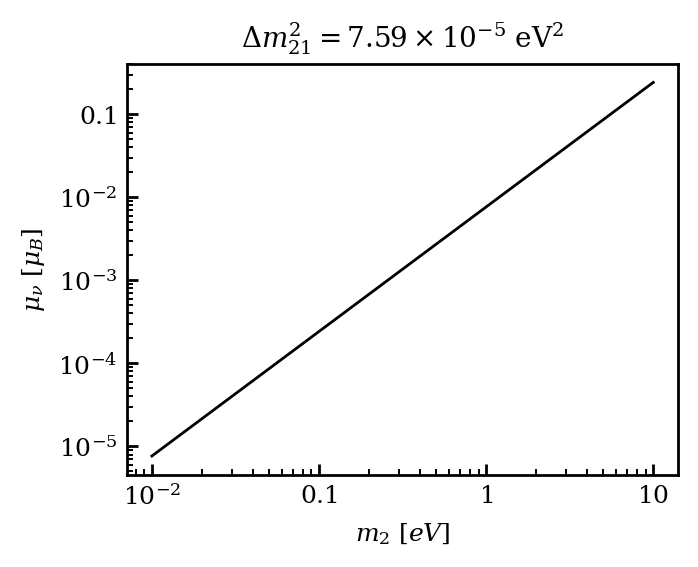

In [38]:
m_i = np.logspace(-2, 1, 1000)
plt.plot(m_i, mu(m_i, 7.59e-5, 1e-3))

plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\mu_\nu ~[\mu_B]$")
plt.xlabel(r"$m_2 ~[eV]$")
plt.title(r"$\Delta m_{21}^2=7.59 \times 10^{-5} ~\mathrm{eV}^2$")

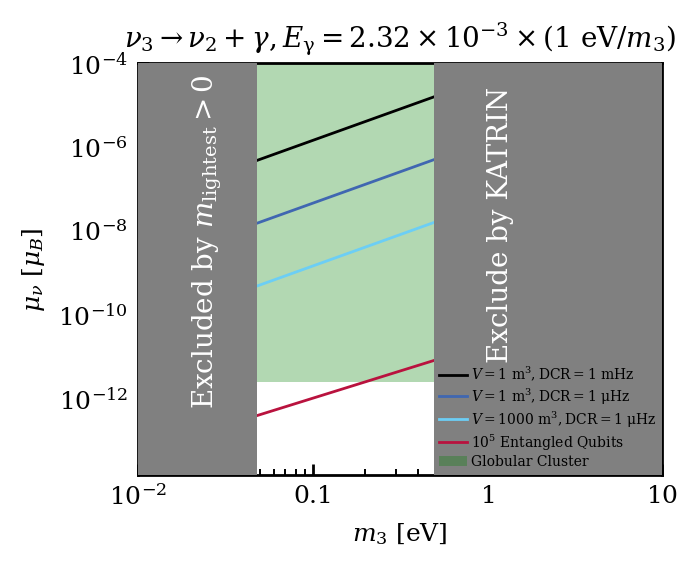

In [124]:
m_i = np.logspace(-2, 1, 1000)
plt.plot(m_i, mu(m_i=m_i, delta_m2=2.32e-3, gamma=1e-3, V=1e6), label=r"$V=1~\mathrm{m}^3, \mathrm{DCR}=1~\mathrm{mHz}$")
plt.plot(m_i, mu(m_i=m_i, delta_m2=2.32e-3, gamma=1e-6, V=1e6), label=r"$V=1~\mathrm{m}^3, \mathrm{DCR}=1~\mathrm{\mu Hz}$")
plt.plot(m_i, mu(m_i=m_i, delta_m2=2.32e-3, gamma=1e-6, V=1e9), label=r"$V=1000~\mathrm{m}^3, \mathrm{DCR}=1~\mathrm{\mu Hz}$")
# Original points
x1, x2 = 1e-1, 1
y1, y2 = 1e-12, 2e-11

# Calculate slope in log-log space (since you're likely using log scales)
slope = (np.log10(y2) - np.log10(y1)) / (np.log10(x2) - np.log10(x1))

# Extrapolate to new range
x_extrap = np.logspace(-2, 1, 100)  # Extend from 0.01 to 10
y_extrap = 10**(np.log10(y1) + slope * (np.log10(x_extrap) - np.log10(x1)))

plt.plot(x_extrap, y_extrap, label=r"$10^5$ Entangled Qubits")
plt.axhspan(2.4e-12, 1e-4, alpha=0.3, label="Globular Cluster", color="green", lw=0)
plt.axvspan(0.01, np.sqrt(2.32e-3), color="gray", zorder=100, lw=0)
plt.axvspan(0.45+np.sqrt(2.32e-3), 10, color="gray", zorder=100, lw=0)
plt.text(2e-2, 1e-12, r"Excluded by $m_\mathrm{lightest}>0$", rotation=90, color="white", zorder=101)
plt.text(1, 1e-11, r"Exclude by KATRIN", rotation=90, color="white", zorder=101)
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\mu_\nu ~[\mu_B]$")
plt.xlabel(r"$m_3 ~[\mathrm{eV}]$")
#plt.title(r"$\Delta m_{32}^2=2.32 \times 10^{-3} ~\mathrm{eV}^2$")
plt.xlim(m_i.min(), m_i.max())
plt.ylim(None, 1e-4)
plt.title(r"$\nu_3 \rightarrow \nu_2 + \gamma, E_\mathrm{\gamma}=2.32\times 10^{-3} \times (1~\mathrm{eV}/m_3)$")
legend = plt.legend(loc="best", fontsize=5)
legend.set_zorder(102)

Still 3 order of magnitude behind the entangled 100k transmon approach...

# Efficiency

# Geometry

One can imagine that 
- A $4\pi$-covered integral sphere
- A conducting sphere with an inner sphere

## Number of Channels

Aparently, the lower the channel number is, the lower the DCR is. However, the lower the channel number is, the lower the detection efficiency is.